In [1]:
import pandas as pd
from utils.unit_conversion import g_per_L_to_mmol

m5_data = pd.read_csv('exp_data/m5.csv')

In [2]:
m5_data.head()

,time,g/L,metabolite
0,0.000000,-0.004233,acetate
1,24.019509,0.722645,acetate
2,48.031350,1.652565,acetate
3,71.909392,3.699241,acetate
4,96.119819,4.261136,acetate


In [12]:
# remove negative values since they are errors from the read-in of data
m5_data = m5_data.applymap(lambda x: 0 if isinstance(x, float) and x < 0 else x)

# get row for mmol
m5_data['mmol'] = m5_data.apply(lambda row: g_per_L_to_mmol(row['metabolite'], row['g/L']), axis=1)

<AxesSubplot: xlabel='time', ylabel='mmol'>

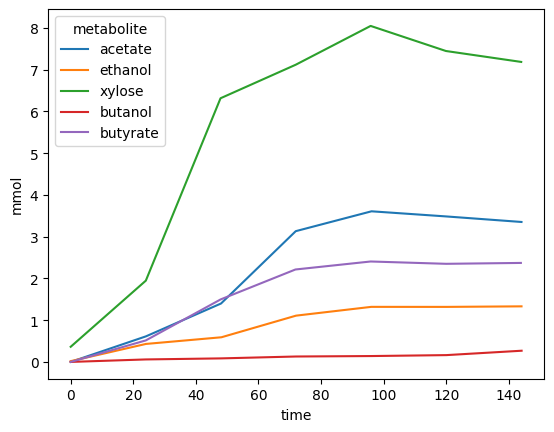

In [43]:
import seaborn as sns

sns.lineplot(data=m5_data, x='time', y='mmol', hue='metabolite')

In [49]:
final_amount = {}
for met in m5_data["metabolite"].unique():
    n = m5_data[m5_data["metabolite"] == met]["mmol"].iloc[-1]
    final_amount[met] = n

In [54]:
final_amount['butyrate'] / final_amount['acetate']

0.707346586712461

- If I make the simplifying assumption of equal production throughout, then it is possible to add in constraints of met x produced in relation to met y
- Since I have numbers for the substrate amount that is added and the amount that is left, yield constraints can also be added
- this can also be used in the acidogenic phase of nj4, BUT NOT SOLVENTOGENIC (for obvious reasons)